<a href="https://colab.research.google.com/github/kb2242/Stroke/blob/main/MLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Read CSV & Discover data

In [ ]:
# Reading data
Data = pd.read_csv('healthcare-dataset-stroke-data.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Dropping columns/rows without integer data
sd = Data.drop(['work_type', 'Residence_type', 'smoking_status', 'id', 'gender'], axis=1)
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   ever_married       5110 non-null   object 
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                4909 non-null   float64
 6   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 279.6+ KB


#Clean data

In [ ]:
strokeData = sd.dropna()
strokeData = sd.dropna().reset_index(drop=True)
print(strokeData)

       age  hypertension  heart_disease ever_married  avg_glucose_level   bmi  \
0     67.0             0              1          Yes             228.69  36.6   
1     80.0             0              1          Yes             105.92  32.5   
2     49.0             0              0          Yes             171.23  34.4   
3     79.0             1              0          Yes             174.12  24.0   
4     81.0             0              0          Yes             186.21  29.0   
...    ...           ...            ...          ...                ...   ...   
4904  13.0             0              0           No             103.08  18.6   
4905  81.0             0              0          Yes             125.20  40.0   
4906  35.0             0              0          Yes              82.99  30.6   
4907  51.0             0              0          Yes             166.29  25.6   
4908  44.0             0              0          Yes              85.28  26.2   

      stroke  
0          1

In [ ]:
strokeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4909 non-null   float64
 1   hypertension       4909 non-null   int64  
 2   heart_disease      4909 non-null   int64  
 3   ever_married       4909 non-null   object 
 4   avg_glucose_level  4909 non-null   float64
 5   bmi                4909 non-null   float64
 6   stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 268.6+ KB


In [ ]:
strokeData.keys()

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke'],
      dtype='object')

In [ ]:
strokeData.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# Changing marital status to binary
strokeData['ever_married'].replace('Yes', 1, inplace = True)
strokeData['ever_married'].replace('No', 0, inplace = True)

In [ ]:
strokeData['hypertension'] = strokeData['hypertension'].astype(float)
strokeData['heart_disease'] = strokeData['heart_disease'].astype(float)
strokeData['ever_married'] = strokeData['ever_married'].astype(float)
strokeData['stroke'] = strokeData['stroke'].astype(float)

In [ ]:
strokeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4909 non-null   float64
 1   hypertension       4909 non-null   float64
 2   heart_disease      4909 non-null   float64
 3   ever_married       4909 non-null   float64
 4   avg_glucose_level  4909 non-null   float64
 5   bmi                4909 non-null   float64
 6   stroke             4909 non-null   float64
dtypes: float64(7)
memory usage: 268.6 KB


#Rediscover data 

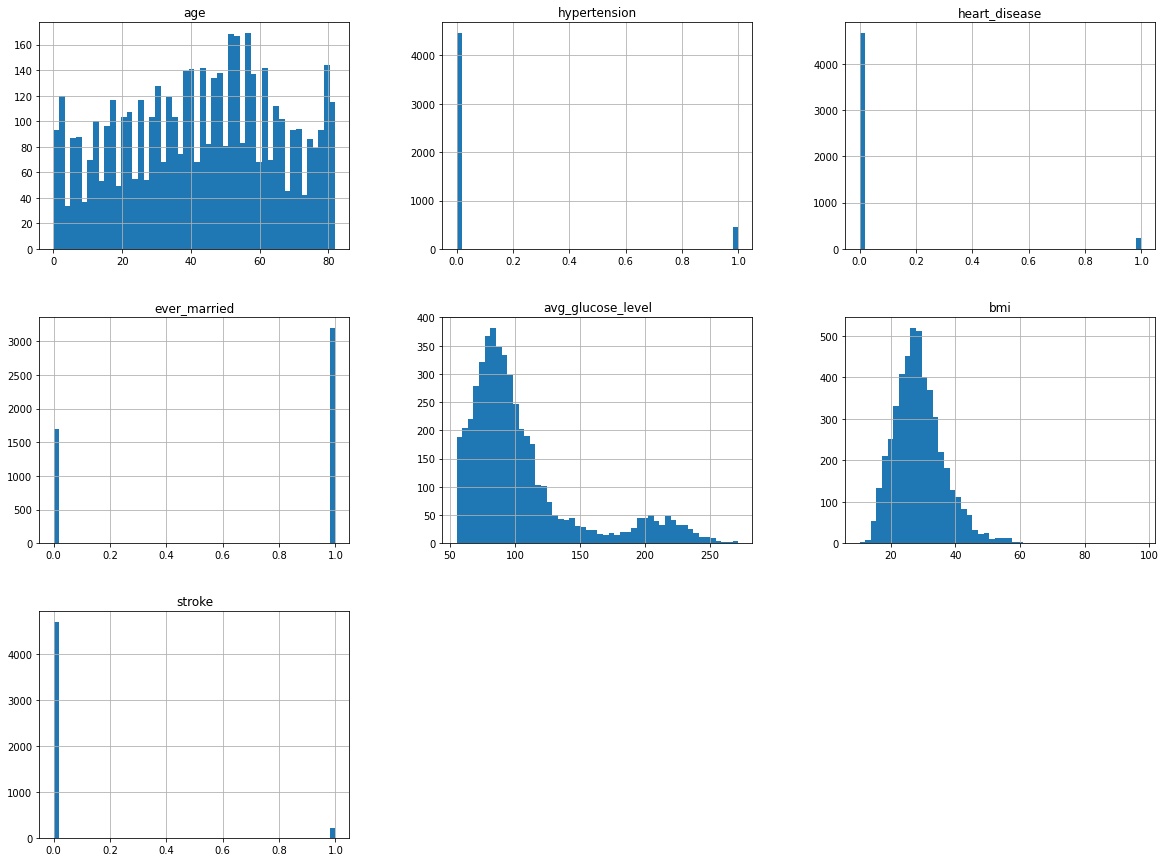

In [ ]:
# Histograms
strokeData.hist(bins=50, figsize=(20,15))

plt.show()

In [ ]:
corr_matrix = strokeData.corr()

In [ ]:
corr_matrix["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.232331
hypertension         0.142515
avg_glucose_level    0.138936
heart_disease        0.137938
ever_married         0.105089
bmi                  0.042374
Name: stroke, dtype: float64

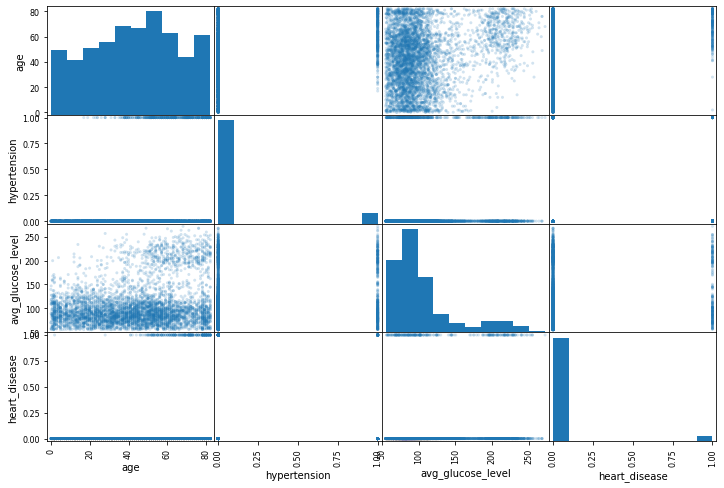

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["age","hypertension", "avg_glucose_level", "heart_disease"]
scatter_matrix(strokeData[attributes], figsize=(12,8), alpha = 0.2)

plt.show()

#Split into train & test

In [ ]:
strokeData = strokeData.sample(frac=1) # shuffles data
X = strokeData.drop("stroke", axis = 1) # splits X
y = strokeData["stroke"].copy() # splits y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42) # splits training and test

In [ ]:
X_train

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi
3376,65.0,1.0,0.0,1.0,189.88,34.0
1323,14.0,0.0,0.0,0.0,91.85,27.8
482,23.0,0.0,0.0,1.0,79.35,39.4
1456,13.0,0.0,0.0,0.0,93.30,25.9
3936,35.0,0.0,0.0,1.0,95.89,34.2
...,...,...,...,...,...,...
3842,44.0,0.0,0.0,1.0,110.41,30.5
2402,75.0,1.0,1.0,1.0,221.43,32.5
2006,49.0,0.0,0.0,1.0,114.76,24.7
4411,56.0,0.0,0.0,1.0,244.30,37.3


In [ ]:
X_test

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi
4516,24.0,0.0,0.0,0.0,95.31,22.8
1136,64.0,1.0,0.0,1.0,78.43,30.2
1779,68.0,1.0,0.0,1.0,95.82,28.6
1306,39.0,0.0,0.0,1.0,205.77,24.1
1609,47.0,0.0,0.0,1.0,108.56,27.3
...,...,...,...,...,...,...
2805,19.0,0.0,0.0,0.0,103.92,24.1
2050,42.0,0.0,0.0,1.0,65.66,33.7
677,51.0,0.0,0.0,1.0,67.97,29.4
2705,27.0,0.0,0.0,1.0,76.19,22.0


#Train Models

### Linear Regression

In [ ]:
X_new = np.array([[24, 1, 0, 1, 120, 29]])

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.coef_

array([ 0.00205967,  0.06495518,  0.0597567 , -0.02823144,  0.00028225,
       -0.00123152])

In [ ]:
lin_reg.predict(X_new)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.05300315])

In [ ]:
X_test1 = X_test.to_numpy(float)
X_new1 = X_test1[1]
y_p1 = lin_reg.predict([X_new1])
y_p1.round(2)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.12])

In [ ]:
y_test1 = y_test.to_numpy(float)
y_test1[1]

0.0

In [ ]:
X_new2 = X_test1[7]
y_p2 = lin_reg.predict([X_new2])
y_p2.round(2)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.03])

In [ ]:
y_test1[7]

0.0

Evaluate 

In [ ]:
lin_reg.score(X_test, y_test)

0.07884304017296029

In [ ]:
y_pred = lin_reg.predict(X_test)
lin_rmse = mean_squared_error(y_test,y_pred ,squared=False)
lin_rmse

0.20280197090167704

### Logistic Regression as binary classifier

In [ ]:
y_train_stroke = (y_train == 1)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

In [ ]:
X_new3 = X_test1[50:55]
log_reg.predict(X_new3)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0., 0., 0., 0., 0.])

In [ ]:
y_test1[50:55]

array([0., 0., 0., 0., 0.])

Evaluate

In [ ]:
y_proba = log_reg.predict_proba(X_new3)
y_proba

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.9041076 , 0.0958924 ],
       [0.99455433, 0.00544567],
       [0.98480748, 0.01519252],
       [0.98780514, 0.01219486],
       [0.93088871, 0.06911129]])

In [ ]:
y_test_stroke = (y_test == 1)

In [ ]:
log_reg.score(X_test, y_test)

0.9531568228105907

In [ ]:
df_val = log_reg.decision_function(X_new3)
df_val

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([-2.24372168, -5.20747437, -4.17164303, -4.39447091, -2.60042155])

In [ ]:
log_cross= cross_val_score(log_reg, X_train, y_train, cv=5, scoring="accuracy")
log_cross

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

array([0.95801527, 0.95801527, 0.95923567, 0.95923567, 0.95796178])

### SGD Classifier as binary classifier

In [ ]:
y_train_no = (y_train == 0)

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_no)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict(X_new3)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False,  True,  True,  True, False])

In [ ]:
y_test1[50:55]

array([0., 0., 0., 0., 0.])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train_no, cv=5, scoring="accuracy")

array([0.95801527, 0.94910941, 0.93630573, 0.94012739, 0.95796178])

In [ ]:
sgd_clf.score(X_test, y_test)

0.17515274949083504

In [ ]:
y_pred2 = sgd_clf.predict(X_test)
sgd_rmse = mean_squared_error(y_test,y_pred2 ,squared=False)
sgd_rmse

0.9082110165094701

### Support Vector Machine



In [ ]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
X_new4 = X_test1[2]
svm_clf.predict([X_new4])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0.])

In [ ]:
y_test1[2]

0.0

In [ ]:
X_new_score = svm_clf.decision_function([X_new4])
X_new_score

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([-0.99986469])

In [ ]:
svm_clf.classes_

array([0., 1.])

In [ ]:
svm_clf.score(X_test,y_test)

0.9531568228105907

In [70]:
X_example = np.array([21, 0, 0, 0, 99, 18.5])
svm_clf.predict([X_example])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0.])

In [ ]:
svm_cross = cross_val_score(svm_clf, X_train, y_train, cv=5, scoring="accuracy")
svm_cross

array([0.95801527, 0.95801527, 0.95923567, 0.95923567, 0.95796178])

### Decision Tree Classifier

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
tree_clf.predict([X_new4])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0.])

In [ ]:
y_test1[2]

0.0